In [166]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Basics

### Rang

#### Linearität zwischen den Spalten

In [60]:
Design_matrix_A = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

rang = np.linalg.matrix_rank(Design_matrix_A)

print(f"Der Rang der Matrix ist: {rang}")

# die spalten sind linear abhängig, da der Rang der Matrix kleiner ist als die Anzahl der Spalten

# Determinante der Matrix
det = np.linalg.det(Design_matrix_A)
print(f"Die Determinante der Matrix ist: {det}")

Der Rang der Matrix ist: 2
Die Determinante der Matrix ist: -9.51619735392994e-16


#### Mehr Variablen als Beobachtungen: p > n

In [50]:
Design_matrix_B = np.array([[4, 9, 1, 4, 7, 9, 5, 8, 1, 2, 9],
                     [2, 3, 1, 2, 3, 4, 2, 5, 2, 0, 10],
                     [1, 2, 1, 1, 2, 2, 1, 3, 8, 7, 6,]])

rang = np.linalg.matrix_rank(Design_matrix_B)
print(f"Der Rang der Matrix ist: {rang}")

Der Rang der Matrix ist: 3


#### Keine Linearität und n > p

In [57]:
df = pd.read_csv('data-2.csv')
Design_matrix_C = np.array(df[['Volume', 'Weight']])

rang = np.linalg.matrix_rank(Design_matrix_C)
print(f"Der Rang der Matrix ist: {rang}")

Der Rang der Matrix ist: 2


### Invertierbarkeit

In [61]:
matrix_A_T = Design_matrix_A.T

matrix_A_inv = np.linalg.inv(matrix_A_T @ Design_matrix_A)
print(matrix_A_inv)

det = np.linalg.det(matrix_A_T @ Design_matrix_A)
print(f"Die Determinante der Matrix ist: {det}")


[[ 5.62949953e+14 -1.12589991e+15  5.62949953e+14]
 [-1.12589991e+15  2.25179981e+15 -1.12589991e+15]
 [ 5.62949953e+14 -1.12589991e+15  5.62949953e+14]]
Die Determinante der Matrix ist: 9.59232693276138e-14


In [54]:
matrix_B_T = Design_matrix_B.T

matrix_B_inv = np.linalg.inv(matrix_B_T @ Design_matrix_B)

Y = [1, 2, 3]

np.dot(matrix_B_inv, matrix_B_T @ Y)
# keine eindutige Lösung

array([-22.40625   ,   6.578125  ,   7.40625   ,  10.59375   ,
         0.640625  ,   0.89160156,  -1.15625   ,  -0.79296875,
        -0.1015625 ,   0.3125    ,   0.1328125 ])

In [59]:
matrix_C_T = Design_matrix_C.T

matrix_C_inv = np.linalg.inv(matrix_C_T @ Design_matrix_C)

Y = np.array(df['CO2'])
np.dot(matrix_C_inv, matrix_C_T @ Y)
# zwei eindeutige Lösungen

array([0.00973607, 0.06478073])

## (einfache) Lineare Regression

In [167]:
xi = [1, 4, 5, 7, 9]
yi = [1.0, 3.1, 4.7, 4.4, 7.5]


In [168]:
def variance(data):
    sum = 0
    mean = np.mean(data)
    for i in range(len(data)):
        sum += (data[i] - mean)**2
    return sum / (len(data) - 1)

def lrm(a, b, x):
    return a + b * x

def residuals(y, x, a, b):
    res = []
    for i in range(len(y)):
        res.append(y[i] - lrm(a, b, x[i]))
    return res

def residuals_var(y, x, a, b):
    res = []
    for i in range(len(y)):
        res.append((y[i] - lrm(a, b, x[i]))**2)
    return sum(res) / (len(y) - 2)

def s_alpha2(x, var_x, var_residuals):
    return ((1 / len(x)) + (np.mean(x)**2) / ((len(x) - 1) * var_x)) * var_residuals

def s_beta2(x, var_x, var_residuals):
    return (1 / ((len(x) - 1) * var_x)) * var_residuals

def matrix_approach(x, y):
    design_matrix = np.c_[np.ones((len(x), 1)), x]
    X = design_matrix
    Y = np.array(y)
    Xt = X.T

    B = np.linalg.inv(Xt.dot(X)).dot(Xt).dot(Y)
    return B

### Model

In [169]:
x_mean = np.mean(xi)
y_mean = np.mean(yi)
x_var = variance(xi)
y_var = variance(yi)
s_xy = np.cov(xi, yi)[1][0]

# Formeln
beta = s_xy / x_var
alpha = y_mean - beta * x_mean

a, b = matrix_approach(xi, yi)

print("--------- Formeln ----------")
print(f"alpha: {alpha}, beta: {beta}")
print(f"y = {alpha:.2f} + {beta:.2f}x")


print("--------- Matrix ----------")
print(f"alpha: {alpha}, beta: {beta}")
print(f"y = {b:.2f}x {a:.2f}")

--------- Formeln ----------
alpha: 0.24565217391304284, beta: 0.748913043478261
y = 0.25 + 0.75x
--------- Matrix ----------
alpha: 0.24565217391304284, beta: 0.748913043478261
y = 0.75x 0.25


### Konfidenzintervalle

In [170]:
t3_975 = 3.1824 # error 0.05

s_alpha =  s_alpha2(xi, x_var, residuals_var(yi, xi, alpha, beta))
I_alpha = [alpha - t3_975 * s_alpha**0.5, alpha + t3_975 * s_alpha**0.5]
print(f"alpha: {alpha}, s_alpha: {s_alpha}, I_alpha: {I_alpha}")

s_beta2 = s_beta2(xi, x_var, residuals_var(yi, xi, alpha, beta))
I_beta = [beta - t3_975 * s_beta2**0.5, beta + t3_975 * s_beta2**0.5]
print(f"beta: {beta}, s_beta: {s_beta2}, I_beta: {I_beta}")

alpha: 0.24565217391304284, s_alpha: 0.6144502205419031, I_alpha: [-2.248931742816872, 2.7402360906429575]
beta: 0.748913043478261, s_beta: 0.017861925015752997, I_beta: [0.32359001584228986, 1.1742360711142323]


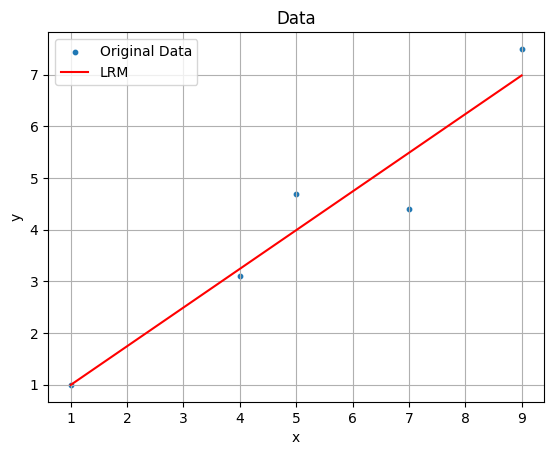

In [171]:
def plot(x, y):
    plt.scatter(x, y, s=10, label="Original Data")
    plt.plot(x, [lrm(a, b, xi) for xi in x], color='red', label="LRM")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Data')
    plt.grid()
    plt.legend()
    plt.show()
    
plot(xi, yi)

## Multiple Lineare Regression

In [6]:
import pandas as pd
from sklearn import linear_model

df = pd.read_csv('data-2.csv')

In [7]:
df

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


### Sklearn

In [173]:
X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

b1, b2 = regr.coef_
b0 = regr.intercept_

print(f"beta0: {b0:2f}, beta1: {b1:2f}, beta2: {b2:2f}")

predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

beta0: 79.694719, beta1: 0.007551, beta2: 0.007805
[114.75968007]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Normalengleichung

In [174]:
x1 = df["Weight"]
x2 = df["Volume"]
x0 = [1] * len(x1)
y = df["CO2"]

X = np.c_[x0, x1, x2]

def lsg_der_normalen_gleichung(x, y):
    X = x
    Xt = X.T
    Y = np.array(y)

    B = np.linalg.inv(Xt.dot(X)).dot(Xt).dot(Y)
    return B

def residuals(y, x, beta0, beta1, beta2):
    res = []
    for i in range(len(y)):
        res.append(y[i] - (beta0 + beta1 * x[i][1] + beta2 * x[i][2]))
    return res

residuen = residuals(y, X, b0, b1, b2)

beta0, beta1, beta2 = lsg_der_normalen_gleichung(X, y)

print(f"beta0: {beta0:2f}, beta1: {beta1:2f}, beta2: {beta2:2f}")

def lrm(x1, x2, beta0, beta1, beta2):
    return beta0 + beta1 * x1 + beta2 * x2


predictedCO2 = lrm(2300, 1300, beta0, beta1, beta2)
print(predictedCO2)

beta0: 79.694719, beta1: 0.007551, beta2: 0.007805
107.20873279893105


### Residuen Analyse

In [175]:
n = 1000
X1 = np.random.normal(50, 10, n) 
X2 = np.random.normal(30, 5, n)
noise = np.random.normal(0, 10, n)
Y = 5 + 1.5 * X1  -2 * X2 + noise
df = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})

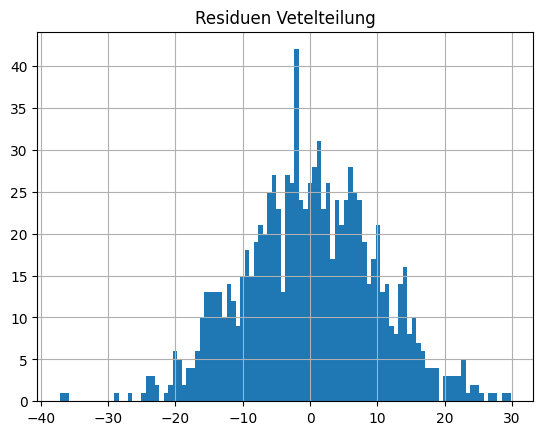

Erwartungswert der Residuen: 4.7350567911053074e-14
Varianz der Residuen: 99.6671976654254


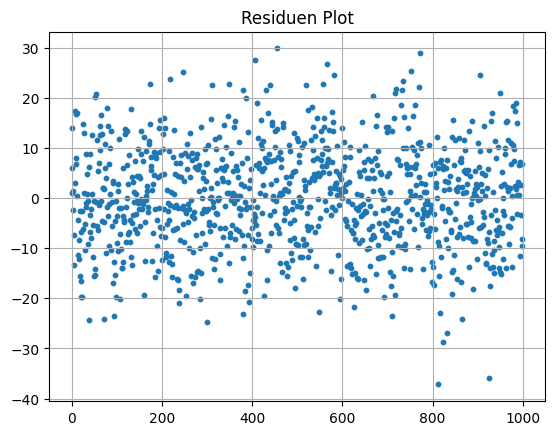

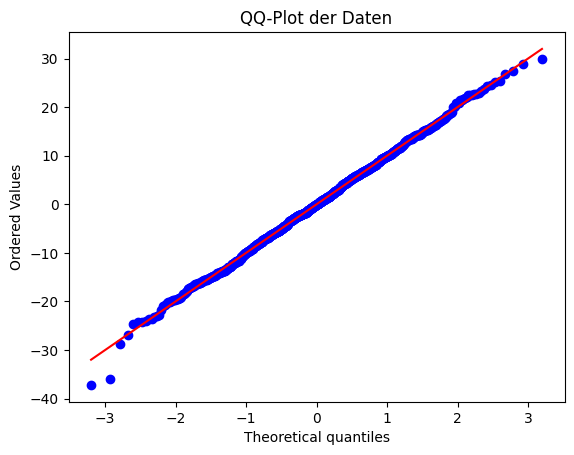

In [176]:
DesignMatrix = np.c_[np.ones(n), df["X1"], df["X2"]]

b0, b1, b2 = lsg_der_normalen_gleichung(x=DesignMatrix, y=df["Y"])

def lrm(x1, x2, beta0, beta1, beta2):
    return beta0 + beta1 * x1 + beta2 * x2

residuen = residuals(df["Y"], DesignMatrix, b0, b1, b2)

plt.hist(residuen, bins=100)
plt.title("Residuen Vetelteilung")
plt.grid()
plt.show()

print("Erwartungswert der Residuen:", np.mean(residuen))
print("Varianz der Residuen:", np.var(residuen))

plt.scatter(range(0, len(residuen)), residuen, s=10)
plt.title("Residuen Plot")
plt.grid()
plt.show()

stats.probplot(np.sort(residuen), dist="norm", plot=plt)
plt.title("QQ-Plot der Daten")
plt.show()

## Logistische Regression

In [177]:
from sklearn.linear_model import LogisticRegression

In [204]:
temp = [66, 67, 68, 70, 72, 75, 76, 79, 53, 58, 70, 75, 67, 67, 69, 70, 73, 76, 78, 81, 57, 63, 70]
ausfall = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
aufall_jn = ['Kein-Ausfall' if i == 0 else 'Ausfall' for i in ausfall]
ausprägung = [i for i in range(len(temp))]

df = pd.DataFrame({"ausprägung": ausprägung, 'temp': temp, 'ausfall': ausfall, 'ausfall_jn': aufall_jn})

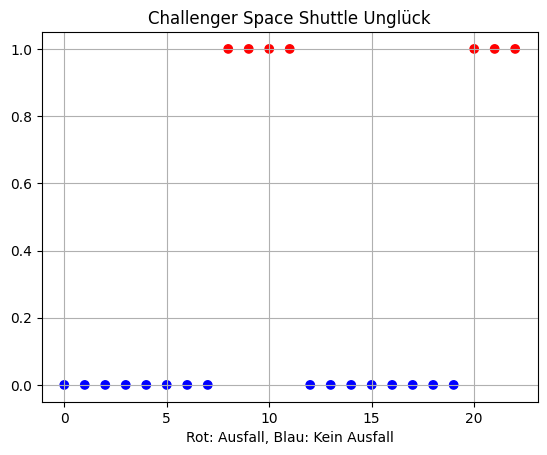

In [205]:
colors = {0: "blue", 1: "red"}
plt.scatter(df["ausprägung"], df["ausfall"], c=df["ausfall"].apply(lambda x: colors[x]))
plt.grid(True)
plt.xlabel("Rot: Ausfall, Blau: Kein Ausfall")
plt.title("Challenger Space Shuttle Unglück")
plt.show()

In [264]:
X = df[['temp']]
y = df['ausfall']

model = LogisticRegression()

model.fit(X, y)

coefficient = model.coef_
intercept = model.intercept_

coefficient = coefficient[0][0]
intercept = intercept[0]
print("Coefficient beta:", coefficient)
print("Intercept alpha:", intercept)
print(f"Linear Kombination y = {intercept:.2f} + {coefficient:.2f}x")

def logit_function(x):
    linear_comb = intercept + coefficient * x
    return 1 / (1 + np.exp(-linear_comb))

x_values = np.linspace(np.min(X.values), np.max(X.values), 100)
logit_data = [logit_function(i) for i in x_values]

Coefficient beta: -0.22950051284078976
Intercept alpha: 14.861927086730802
Linear Kombination y = 14.86 + -0.23x


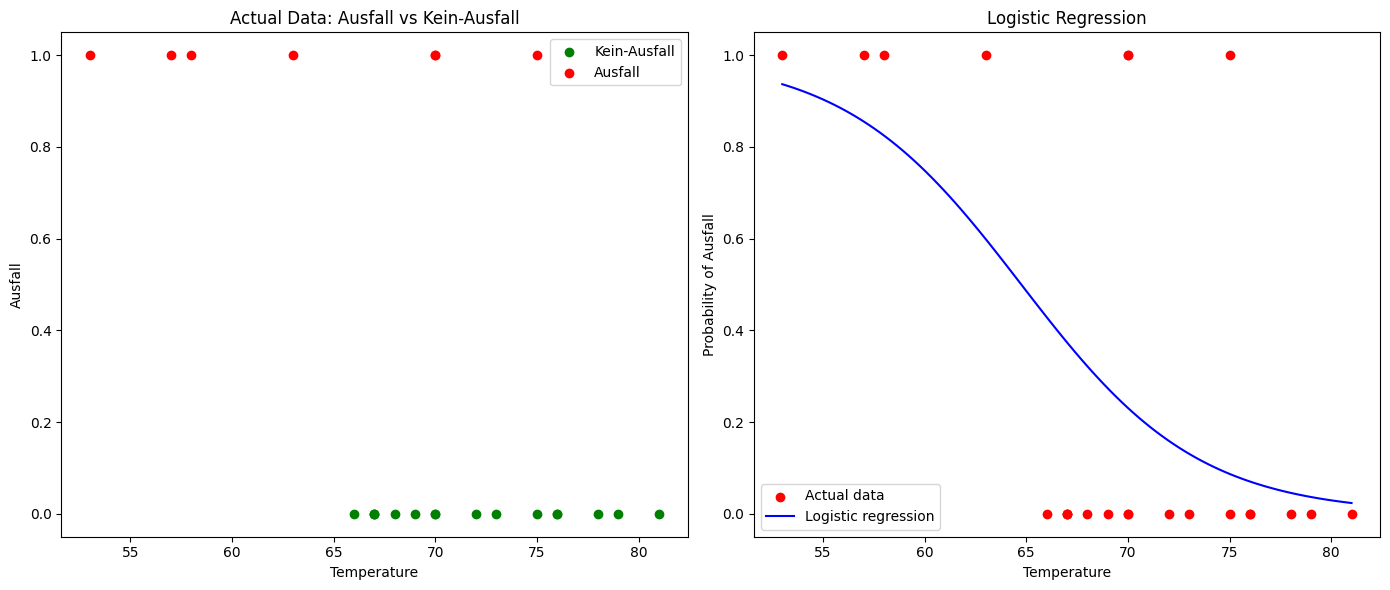

In [262]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

colors = {'Kein-Ausfall': 'green', 'Ausfall': 'red'}
for ausfall_type in df['ausfall_jn'].unique():
    subset = df[df['ausfall_jn'] == ausfall_type]
    ax[0].scatter(subset['temp'], subset['ausfall'], label=ausfall_type, color=colors[ausfall_type])

ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Ausfall')
ax[0].legend()
ax[0].set_title('Actual Data: Ausfall vs Kein-Ausfall')

ax[1].scatter(temp, ausfall, color='red', label='Actual data')
ax[1].plot(x_values, logit_data, color='blue', label='Logistic regression')
ax[1].set_xlabel('Temperature')
ax[1].set_ylabel('Probability of Ausfall')
ax[1].legend()
ax[1].set_title('Logistic Regression')

plt.tight_layout()
plt.show()

## Poisson Regression

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, chisquare
import numpy as np
from statsmodels.graphics.gofplots import qqplot

In [182]:
data = pd.DataFrame(
    {
        "Nummer": [i for i in range(1, 42)],
        "Alter": [27, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 32, 33, 33, 33, 33, 33, 34, 34, 34, 
                  34, 36, 36, 37, 37, 37, 38, 39, 41, 42, 43, 43, 43, 43, 43, 44, 45, 47, 48, 52],
        "Paarungen": [0, 1, 1, 1, 3, 0, 0, 0, 2, 2,2, 1, 2, 4, 3, 3, 3, 2, 1, 1, 2, 3, 5, 6, 1, 1, 6, 2, 1, 3, 4, 0, 2, 3, 4, 9, 3, 5, 7, 2, 9]
    }
)

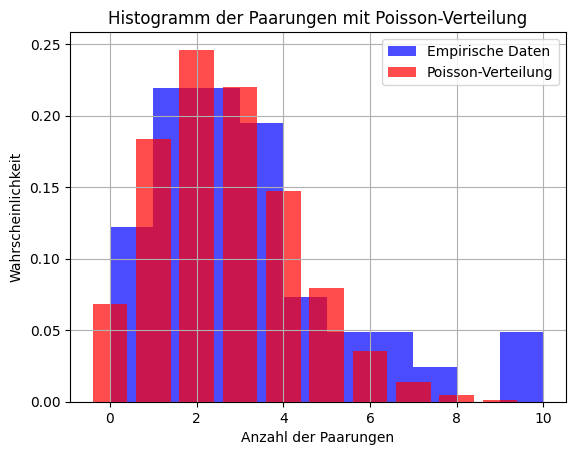

In [183]:
data['Paarungen'].hist(bins=range(int(data['Paarungen'].max()) + 2),
                       alpha=0.7, color='blue', density=True, label='Empirische Daten')

mu = data['Paarungen'].mean()
poisson_values = [poisson.pmf(k, mu) for k in range(int(data['Paarungen'].max()) + 1)]
plt.bar(range(int(data['Paarungen'].max()) + 1), poisson_values, alpha=0.7, color='red', label='Poisson-Verteilung')

plt.xlabel('Anzahl der Paarungen')
plt.ylabel('Wahrscheinlichkeit')
plt.title('Histogramm der Paarungen mit Poisson-Verteilung')
plt.legend()
plt.show()

## Gemischtes Modell

### Datensatz

In [184]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [185]:
np.random.seed(123)

anzahl_an_klassen = 30
anzahl_an_schülern = 10
klassen = np.repeat(np.arange(anzahl_an_klassen), anzahl_an_schülern)

lern_stunden = np.random.normal(5, 2, size=anzahl_an_klassen * anzahl_an_schülern)
ergebnis = 50 + 3 * lern_stunden + np.random.normal(0, 5, size=anzahl_an_klassen * anzahl_an_schülern)
zufälliger_effekt = np.random.normal(0, 5, size=anzahl_an_klassen)
ergebnis += [zufälliger_effekt[i] for i in klassen]

data = pd.DataFrame({
    "Klasse": klassen,
    "Schüler": [i for i in range(anzahl_an_klassen * anzahl_an_schülern)],
    "Lernstunden": lern_stunden,
    "Ergebnis": ergebnis
})

data.head()

,Klasse,Schüler,Lernstunden,Ergebnis
0,0,0,2.828739,68.014772
1,0,1,6.994691,72.542410
2,0,2,5.565957,69.105396
3,0,3,1.987411,64.721131
4,0,4,3.842799,66.511613


### Plots

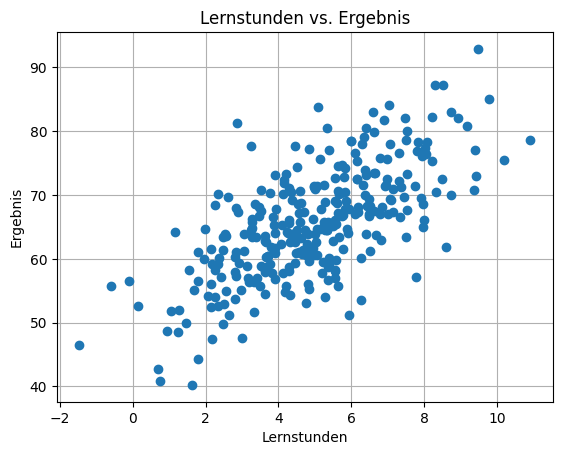

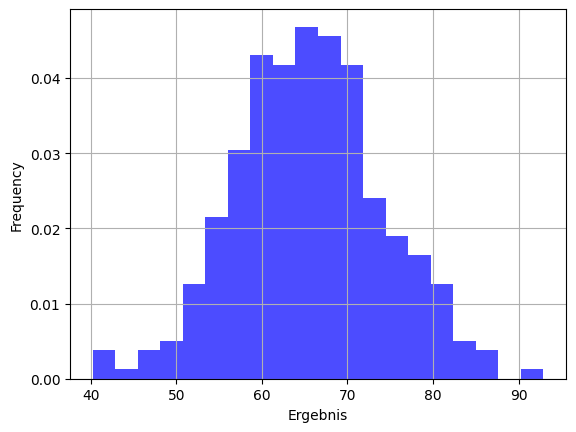

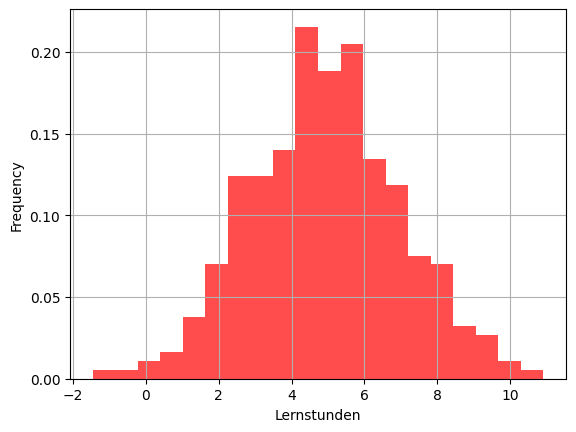

In [186]:
plt.plot(data['Lernstunden'], data['Ergebnis'], 'o')
plt.xlabel('Lernstunden')
plt.ylabel('Ergebnis')
plt.title('Lernstunden vs. Ergebnis')
plt.grid()
plt.show()

plt.hist(data['Ergebnis'], bins=20, alpha=0.7, color='blue', density=True)
plt.xlabel('Ergebnis')
plt.ylabel('Frequency')
plt.grid()
plt.show()

plt.hist(data['Lernstunden'], bins=20, alpha=0.7, color='red', density=True)
plt.xlabel('Lernstunden')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### Modell

In [187]:
mixed_model = smf.mixedlm("Ergebnis ~ Lernstunden", data, groups=data['Klasse'])
mixed_model_fit = mixed_model.fit()

print("\nGeschätzte Koeffizienten:")
print(mixed_model_fit.params)


Geschätzte Koeffizienten:
Intercept      51.931369
Lernstunden     2.758297
Group Var       0.720782
dtype: float64


### Ergebnis_ij = 51.931 + 2.758*LernStunden_ij mit i-ten Schülers in der j-ten Klasse.

## PCA

In [188]:
data = pd.read_csv("iris.csv")

#### Kovarianzmatrix

In [189]:
# 1) Daten zur Matrix umwandeln und transponieren
M = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].to_numpy().T

# 2) Mittelwerte der Zeilen berechnen für die Zentrierung
row_means = np.mean(M, axis=1)
X = M - row_means[:, np.newaxis]

# 3) Kovarianzmatrix berechnen
A = X @ X.T

print("\nKovarianzmatrix:")
print(A)


Kovarianzmatrix:
[[102.16833333  -6.32266667 189.873       76.92433333]
 [ -6.32266667  28.30693333 -49.1188     -18.12426667]
 [189.873      -49.1188     464.3254     193.0458    ]
 [ 76.92433333 -18.12426667 193.0458      86.56993333]]


#### Eigenwertproblem

In [190]:
eigenvalues, eigenvectors = np.linalg.eig(A)

print("\nEigenwerte:")
for i in range(len(eigenvalues)):
    print(f" λ_{i + 1}: {eigenvalues[i]}")

print("\nEigenvektoren:")
for i in range(len(eigenvectors)):
    print(f" ev_{i + 1}: {eigenvectors[i]}")


Eigenwerte:
 λ_1: 630.008014199195
 λ_2: 36.157941441366404
 λ_3: 11.653215506395
 λ_4: 3.551428853043941

Eigenvektoren:
 ev_1: [ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 ev_2: [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 ev_3: [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 ev_4: [0.3582892  0.07548102 0.54583143 0.75365743]


#### Anteil der Varianz

In [191]:
anteil_var = [i for i in eigenvalues / sum(eigenvalues)]
for i in range(len(anteil_var)):
    print(f"Anteil der Varianz für λ_{i + 1}: {anteil_var[i]}")

Anteil der Varianz für λ_1: 0.9246187232017271
Anteil der Varianz für λ_2: 0.053066483117067846
Anteil der Varianz für λ_3: 0.017102609807929773
Anteil der Varianz für λ_4: 0.005212183873275335


#### Projektion


Sortierte Eigenwerte:
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]

Hauptkomponenten:
[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]


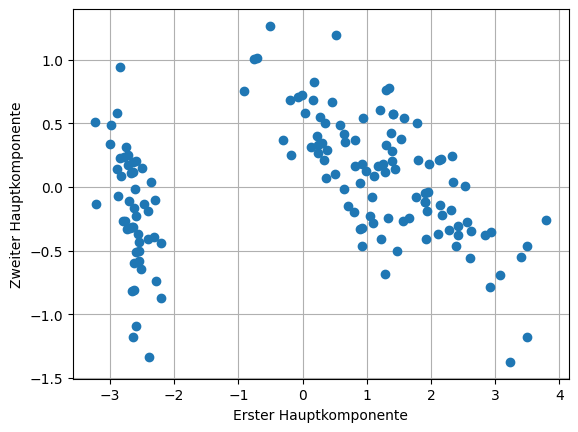

In [192]:
indices = np.argsort(eigenvalues)[::-1]
print("\nSortierte Eigenwerte:")
sorted_eigenvectors = eigenvectors[:, indices]
print(sorted_eigenvectors)

principal_eigenvectors = sorted_eigenvectors[:, :2]
print("\nHauptkomponenten:")
print(principal_eigenvectors)
projected_data = X.T @ principal_eigenvectors

plt.plot(projected_data[:, 0], projected_data[:, 1], 'o')
plt.xlabel('Erster Hauptkomponente')
plt.ylabel('Zweiter Hauptkomponente')
plt.grid()
plt.show()

## Explorative Faktorenanalyse

In [193]:
def arrow_plot(loadings, index):
    fig, ax = plt.subplots()
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axhline(0, color='grey', lw=0.5)
    ax.axvline(0, color='grey', lw=0.5)
    ax.set_xlabel('Factor 1')
    ax.set_ylabel('Factor 2')

    # Adding arrows and labels for the new data structure
    for i, (x, y) in enumerate(loadings):
        ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.05, fc='blue', ec='blue')
        ax.text(x, y, index[i], fontsize=12, ha='right' if x < 0 else 'left')

    plt.title('Arrow Plot of Loadings')
    plt.grid(True)
    plt.show()

In [194]:
from factor_analyzer import FactorAnalyzer

df = pd.read_csv('auto.csv')
matrix = df.to_numpy()

### Kovarianzmatrix

In [195]:
cov_matrix = np.cov(matrix.T)
pd.DataFrame(cov_matrix)

,0,1,2,3,4,5,6
0,11.500000,9.141667,8.066667,-2.975000,-6.650000,1.875000,-6.591667
1,9.141667,10.960000,7.231667,0.073333,-2.831667,3.208333,-3.488333
2,8.066667,7.231667,7.493333,0.735000,-1.935000,4.208333,-1.211667
3,-2.975000,0.073333,0.735000,15.310000,12.490000,9.875000,15.138333
4,-6.650000,-2.831667,-1.935000,12.490000,15.293333,8.666667,16.011667
5,1.875000,3.208333,4.208333,9.875000,8.666667,10.583333,10.791667
6,-6.591667,-3.488333,-1.211667,15.138333,16.011667,10.791667,20.290000


### Korrelationsmatrix

In [196]:
cor_matrix = np.corrcoef(matrix.T)
pd.DataFrame(cor_matrix)

,0,1,2,3,4,5,6
0,1.000000,0.814275,0.868976,-0.224208,-0.501443,0.169958,-0.431524
1,0.814275,1.000000,0.797987,0.005661,-0.218719,0.297895,-0.233922
2,0.868976,0.797987,1.000000,0.068622,-0.180756,0.472565,-0.098266
3,-0.224208,0.005661,0.068622,1.000000,0.816251,0.775779,0.858914
4,-0.501443,-0.218719,-0.180756,0.816251,1.000000,0.681224,0.908959
5,0.169958,0.297895,0.472565,0.775779,0.681224,1.000000,0.736438
6,-0.431524,-0.233922,-0.098266,0.858914,0.908959,0.736438,1.000000


### Reduzierte Korrelationsmatrix

In [197]:
auto_cor_redu = cor_matrix.copy()
rquadrat = 1 - (1 / np.diag(np.linalg.inv(cor_matrix)))
np.fill_diagonal(auto_cor_redu, rquadrat)

### Wie viele Faktoren?

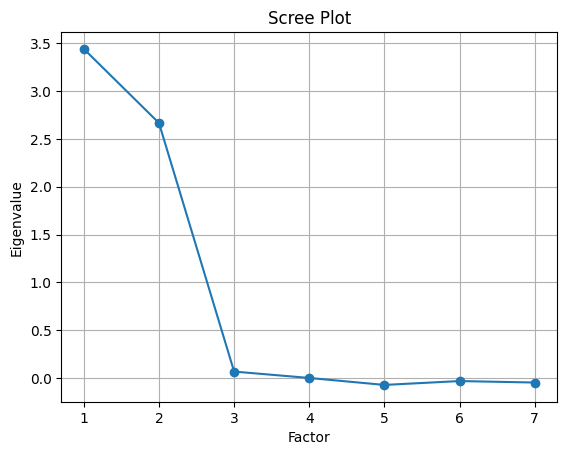

Eigenvalues: [ 3.44078841e+00  2.66636458e+00  6.86352937e-02  1.87946322e-03
 -7.08035345e-02 -3.03921535e-02 -4.58140392e-02]
Signs of eigenvalues: [ 1.  1.  1.  1. -1. -1. -1.]
Sum of eigenvalues: 6.030658020110132


In [198]:
evals = np.linalg.eigvals(auto_cor_redu)
plt.plot(range(1, len(evals) + 1), evals, marker='o')
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

print("Eigenvalues:", evals)
print("Signs of eigenvalues:", np.sign(evals))
print("Sum of eigenvalues:", np.sum(evals))

### Factor Analysis ohne Rotation

[[ 0.95232429  0.25814979]
 [ 0.74641674  0.39333406]
 [ 0.76464049  0.55230518]
 [-0.44994774  0.77883157]
 [-0.69798712  0.6470928 ]
 [-0.08183151  0.95862759]
 [-0.64790632  0.71319535]]
--------------- Factor 1, Factor 2 
SS Loadings: [3.16485259 2.97931619]
Proportion Var: [0.4521218 0.4256166]
Cumulative Var: [0.4521218 0.8777384]


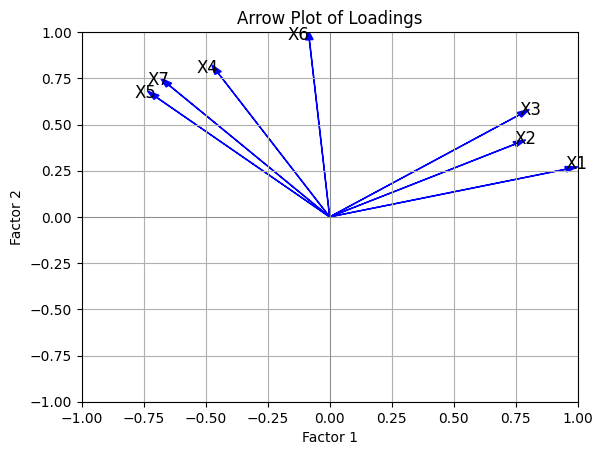

In [199]:
fa = FactorAnalyzer(n_factors=2, rotation=None, method="ml")
fa.fit(matrix)
fa_loadings = fa.loadings_
ss_loading, proportion_var, cum_var = fa.get_factor_variance()

# Extract the loadings for the first two factors
fa_auto_lad = fa_loadings[:, :2]
print(fa_auto_lad)
print("--------------- Factor 1, Factor 2 ")
print("SS Loadings:", ss_loading)
print("Proportion Var:", proportion_var)
print("Cumulative Var:", cum_var)

arrow_plot(fa_auto_lad, df.columns)

### Factor Analysis mit Rotation 

[[-2.52155016e-01  9.53929095e-01]
 [-3.21796631e-02  8.43097920e-01]
 [ 9.64257037e-02  9.38306015e-01]
 [ 8.99461584e-01 -6.67978986e-04]
 [ 9.09261843e-01 -2.81350353e-01]
 [ 8.71301139e-01  4.08041155e-01]
 [ 9.41503404e-01 -2.04942793e-01]]
--------------- Factor 1, Factor 2 
SS Loadings: [3.35529817 2.7888706 ]
Proportion Var: [0.47932831 0.39841009]
Cumulative Var: [0.47932831 0.8777384 ]


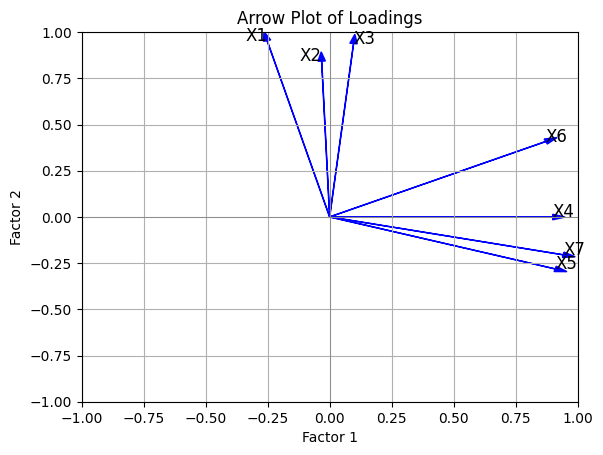

In [200]:
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="ml")
fa.fit(matrix)
fa_loadings = fa.loadings_
ss_loading, proportion_var, cum_var = fa.get_factor_variance()

# Extract the loadings for the first two factors
fa_auto_lad = fa_loadings[:, :2]
print(fa_auto_lad)
print("--------------- Factor 1, Factor 2 ")
print("SS Loadings:", ss_loading)
print("Proportion Var:", proportion_var)
print("Cumulative Var:", cum_var)

arrow_plot(fa_auto_lad, df.columns)